<a href="https://colab.research.google.com/github/louismagowan/data_volunteering/blob/main/cross_purpose-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the environment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import math
import matplotlib.ticker as ticker

import statsmodels.api as sm
from statsmodels.formula.api import logit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Things for prettier graphs

def get_plot_cmaps():
    """
    returns the jf color maps as dict
    """
    # colors
    colors = get_plot_colors(jf_template=True)

    # cmap
    cmaps = {
        "gcb": [
            colors["green"]["primary"],
            colors["cyan"]["primary"],
            colors["blue"]["primary"],
            colors["green"]["secondary"],
            colors["cyan"]["secondary"],
            colors["blue"]["secondary"],
            colors["green"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["blue"]["tertiary"],
        ],
        "cbv": [
            colors["cyan"]["primary"],
            colors["blue"]["primary"],
            colors["violet"]["primary"],
            colors["cyan"]["secondary"],
            colors["blue"]["secondary"],
            colors["violet"]["secondary"],
            colors["cyan"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["violet"]["tertiary"],
        ],
        "bvr": [
            colors["blue"]["primary"],
            colors["violet"]["primary"],
            colors["red"]["primary"],
            colors["blue"]["secondary"],
            colors["violet"]["secondary"],
            colors["red"]["secondary"],
            colors["blue"]["tertiary"],
            colors["violet"]["tertiary"],
            colors["red"]["tertiary"],
        ],
        "roy": [
            colors["red"]["primary"],
            colors["orange"]["primary"],
            colors["yellow"]["primary"],
            colors["red"]["secondary"],
            colors["orange"]["secondary"],
            colors["yellow"]["secondary"],
            colors["red"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["yellow"]["tertiary"],
        ],
        "all": [
            colors["violet"]["primary"],
            colors["blue"]["primary"],
            colors["cyan"]["primary"],
            colors["green"]["primary"],
            colors["yellow"]["primary"],
            colors["orange"]["primary"],
            colors["red"]["primary"],
            colors["violet"]["secondary"],
            colors["blue"]["secondary"],
            colors["cyan"]["secondary"],
            colors["green"]["secondary"],
            colors["yellow"]["secondary"],
            colors["orange"]["secondary"],
            colors["red"]["secondary"],
            colors["violet"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["green"]["tertiary"],
            colors["yellow"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["red"]["tertiary"],
        ],
        "primary": [
            colors["violet"]["primary"],
            colors["blue"]["primary"],
            colors["cyan"]["primary"],
            colors["green"]["primary"],
            colors["yellow"]["primary"],
            colors["orange"]["primary"],
            colors["red"]["primary"],
        ],
        "secondary": [
            colors["violet"]["secondary"],
            colors["blue"]["secondary"],
            colors["cyan"]["secondary"],
            colors["green"]["secondary"],
            colors["yellow"]["secondary"],
            colors["orange"]["secondary"],
            colors["red"]["secondary"],
        ],
        "tertiary": [
            colors["violet"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["green"]["tertiary"],
            colors["yellow"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["red"]["tertiary"],
        ],
    }
    return cmaps
def set_default_font():
    """
    set the jf font (Noto Sans)
    - need to copy fonts to folder
    """
    # del matplotlib cache
    os.system('rm -fr ~/.matplotlib')

    # set font family
    plt.rcParams['font.family'] = 'Noto Sans'


def set_default_plot_format():
    """
    set predefined paramaters for plotting
    - font
    - formatting
    """
    # font
    set_default_font()

    # formatting
    plt.rc('font', size=24)
    plt.rc('axes', labelsize=30, linewidth=3)

def get_plot_colors(jf_template=False):
 
    
    # jf colors
    if jf_template:
        colors = {
            "blue": {
                "default": "#0078ff",
                "dark": "#094ecd",
                "light": "#8fe2ff"
            },
            "cyan": {
                "default": "#45dfd7",
                "dark": "#19b5aa",
                "light": "#a6fffa"
            },
            "green": {
                "default": "#27e284",
                "dark": "#00c15c",
                "light": "#92f7c7"
            },
            "violet": {
                "default": "#6c00ff",
                "dark": "#5226bd",
                "light": "#c9a6ff"
            },
            "red": {
                "default": "#ff415b",
                "dark": "#d51944",
                "light": "#ff809e"
            },
            "orange": {
                "default": "#ffa218",
                "dark": "#f46800",
                "light": "#ffc67b"
            },
            "yellow": {
                "default": "#ffde3e",
                "dark": "#ffc200",
                "light": "#fff176"
            },
            "grey": {
                "default": "#BAD1CF",
                "dark": "#2a3d3d",
                "light": "#E6F5F5"
            }
        }
    else:
        colors = {
            'base03': '#002b36',
            'base02': '#073642',
            'base01': '#586e75',
            'base00': '#657b83',
            'base0': '#839496',
            'base1': '#93a1a1',
            'base2': '#eee8d5',
            'base3': '#fdf6e3',
            'yellow': '#b58900',
            'orange': '#cb4b16',
            'red': '#dc322f',
            'magenta': '#d33682',
            'violet': '#6c71c4',
            'blue': '#268bd2',
            'cyan': '#2aa198',
            'green': '#859900'
        }
    return colors


def get_plot_cmaps():
    """
    returns the jf color maps as dict
    """
    # colors
    colors = get_plot_colors(jf_template=True)

    # cmap
    cmaps = {
        "gcb": [
            colors["green"]["primary"],
            colors["cyan"]["primary"],
            colors["blue"]["primary"],
            colors["green"]["secondary"],
            colors["cyan"]["secondary"],
            colors["blue"]["secondary"],
            colors["green"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["blue"]["tertiary"],
        ],
        "cbv": [
            colors["cyan"]["primary"],
            colors["blue"]["primary"],
            colors["violet"]["primary"],
            colors["cyan"]["secondary"],
            colors["blue"]["secondary"],
            colors["violet"]["secondary"],
            colors["cyan"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["violet"]["tertiary"],
        ],
        "bvr": [
            colors["blue"]["primary"],
            colors["violet"]["primary"],
            colors["red"]["primary"],
            colors["blue"]["secondary"],
            colors["violet"]["secondary"],
            colors["red"]["secondary"],
            colors["blue"]["tertiary"],
            colors["violet"]["tertiary"],
            colors["red"]["tertiary"],
        ],
        "roy": [
            colors["red"]["primary"],
            colors["orange"]["primary"],
            colors["yellow"]["primary"],
            colors["red"]["secondary"],
            colors["orange"]["secondary"],
            colors["yellow"]["secondary"],
            colors["red"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["yellow"]["tertiary"],
        ],
        "all": [
            colors["violet"]["primary"],
            colors["blue"]["primary"],
            colors["cyan"]["primary"],
            colors["green"]["primary"],
            colors["yellow"]["primary"],
            colors["orange"]["primary"],
            colors["red"]["primary"],
            colors["violet"]["secondary"],
            colors["blue"]["secondary"],
            colors["cyan"]["secondary"],
            colors["green"]["secondary"],
            colors["yellow"]["secondary"],
            colors["orange"]["secondary"],
            colors["red"]["secondary"],
            colors["violet"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["green"]["tertiary"],
            colors["yellow"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["red"]["tertiary"],
        ],
        "primary": [
            colors["violet"]["primary"],
            colors["blue"]["primary"],
            colors["cyan"]["primary"],
            colors["green"]["primary"],
            colors["yellow"]["primary"],
            colors["orange"]["primary"],
            colors["red"]["primary"],
        ],
        "secondary": [
            colors["violet"]["secondary"],
            colors["blue"]["secondary"],
            colors["cyan"]["secondary"],
            colors["green"]["secondary"],
            colors["yellow"]["secondary"],
            colors["orange"]["secondary"],
            colors["red"]["secondary"],
        ],
        "tertiary": [
            colors["violet"]["tertiary"],
            colors["blue"]["tertiary"],
            colors["cyan"]["tertiary"],
            colors["green"]["tertiary"],
            colors["yellow"]["tertiary"],
            colors["orange"]["tertiary"],
            colors["red"]["tertiary"],
        ],
    }
    return cmaps


In [ ]:
get_plot_colors()
set_default_font()
set_default_plot_format()

# Importing/cleaning the data

In [ ]:
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1wUq3ZxBTXzlzMlvBh4qCjcjJobBw8XPwmbFAA4rqKOY/edit#gid=955441670')
sheet = wb.worksheet('Raw Data')
data = sheet.get_all_values()

Merged the cells, easier to just run it all at once from the raw data- just in case you lose track of what formatting you've already done or try to drop a column you'd already dropped

In [ ]:
#@title Cleaning data
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:]

pattern = r"[^a-zA-Z0-9]"
df.columns = [re.sub(pattern, " ", x.lower().strip()) for x in df.columns]
df.columns = [re.sub(r"\s+", "_", x.strip()) for x in df.columns]

# drop column created just for DataStudio
df = df.drop(columns='average_tech_skills')

In [ ]:
#@title Find column selection in this cell
# Select columns to use
cols = ['status',
 'graduation_wage',
  'employed_6_months',
  'wage_6_months',
  'employed_12_months',
  'wage_12_months',
  'gender',
  'age',
  'application_race_ethnicity',
  'application_highest_level_of_education',
  'casas_math_grade',
  'casas_reading_grade',
  'baseline_drug_test_results',
  'background_check_status',
  'typing_scores',
  'application_are_you_a_u_s_citizen',
  'application_do_you_identify_as_a_single_parent',
  'application_do_you_receive_any_government_assistance',
  'basic_computer_skills',
  'internet_basics',
  'windows_10',
  'using_email',
  'microsoft_word',
  'social_media',
  'excel',
  'commute_time_min']

clean = df[cols].copy()

In [ ]:
clean.head()

,status,graduation_wage,employed_6_months,wage_6_months,employed_12_months,wage_12_months,gender,age,application_race_ethnicity,application_highest_level_of_education,casas_math_grade,casas_reading_grade,baseline_drug_test_results,background_check_status,typing_scores,application_are_you_a_u_s_citizen,application_do_you_identify_as_a_single_parent,application_do_you_receive_any_government_assistance,basic_computer_skills,internet_basics,windows_10,using_email,microsoft_word,social_media,excel,commute_time_min
1,Out Of Program,,,,,,Male,24,Hispanic or Latino,"Some college, no degree",12,12,"Positive, THC",Misdemeanor,38,1,0,1,95,94,96,96,92,91,71,
2,Graduated,16.00,Yes,15.00,Yes,15.00,Female,18,Hispanic or Latino,High school diploma or GED,8,10,Negative,Clean,39,1,1,1,86,90,86,92,91,91,93,
3,Out Of Program,,,,,,Male,35,White,Bachelor?s degree,12,7,Negative,Traffic Infractions ONLY,22,0,0,1,88,100,93,89,86,81,66,
4,Out Of Program,,,,,,Female,48,Asian,Associate degree,12,12,Negative,Traffic Infractions ONLY,,1,0,1,,,,,,,,
5,Out Of Program,,,,,,Male,51,Black or African American,Technical/Vocational certificate,11,12,Negative,Misdemeanor + Felony,,1,0,0,83,99,76,89,88,83,,


In [ ]:
#@title Convert columns to numeric 
numeric_columns = ['graduation_wage', 'wage_6_months', 'wage_12_months', 'age', 'casas_math_grade', 'casas_reading_grade',
                   'typing_scores', 'basic_computer_skills', 'internet_basics', 'windows_10', 'using_email', 'microsoft_word',
                   'social_media', 'excel', 'commute_time_min']

for column in numeric_columns:
  clean[column] = pd.to_numeric(clean[column], errors='coerce')

In [ ]:
#@title Create variable to measure data completeness
#@markdown Perhaps the people who are more serious about completing are more likely to provide all the info
data_completeness_cols = clean.isna().sum().sort_values(ascending=False).head(12).index.to_list()
data_completeness_cols = [
#'wage_12_months',
 #'wage_6_months',
 #'graduation_wage', #### Exclude wage data
 'social_media',
 'excel',
 'microsoft_word',
 'windows_10',
 'using_email',
 'internet_basics',
 'basic_computer_skills',
 'commute_time_min',
 'typing_scores']

col_count = len(data_completeness_cols)

num_missing_data = clean[data_completeness_cols].isna().sum(axis=1)

clean['data_completeness'] = (col_count - num_missing_data) * 100 / col_count


# **Regressions**

# Multivariate

In [ ]:
regdf = clean.copy()
# regdf.loc[regdf.wage_12_months>=0, 'wage_12_months'].value_counts()

In [ ]:
# There's quite a lot of missing data on wages 6/12 months
regdf.wage_6_months.value_counts().head()

16.0    11
14.0     8
15.0     7
14.5     6
20.0     4
Name: wage_6_months, dtype: int64

In [ ]:
# Select multivariate regression variables
regdf.loc[regdf.status == 'Out Of Program', 'status'] = 0
regdf.loc[regdf.status == 'Graduated', 'status'] = 1
regression_variables = [
                        'casas_reading_grade',
                        'casas_math_grade',
                        'microsoft_word',
                        'windows_10',
                        'commute_time_min',
                        'social_media',
                        'basic_computer_skills',
                        'excel',
                        'data_completeness'
                        ]


# dependent variable
y = regdf.graduation_wage.fillna(0)

In [ ]:
# Statsmodel Ordinary Least Squares- Multivariate Regression
X = regdf[regression_variables].fillna(0)
y = y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        graduation_wage   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     5.017
Date:                Sat, 28 Nov 2020   Prob (F-statistic):           1.68e-06
Time:                        10:40:44   Log-Likelihood:                -1852.6
No. Observations:                 531   AIC:                             3725.
Df Residuals:                     521   BIC:                             3768.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.51

In [ ]:
# Extract summary into df
lm_overview = est2.summary2().tables[0]
lm_overview.columns = ['one', 'two', 'three', 'four']
lm_overview

,one,two,three,four
0,Model:,OLS,Adj. R-squared:,0.064
1,Dependent Variable:,graduation_wage,AIC:,3725.1520
2,Date:,2020-11-28 10:40,BIC:,3767.8996
3,No. Observations:,531,Log-Likelihood:,-1852.6
4,Df Model:,9,F-statistic:,5.017
5,Df Residuals:,521,Prob (F-statistic):,1.68e-06
6,R-squared:,0.080,Scale:,63.996


In [ ]:
# Prob F-stats
lm_fstat = lm_overview.loc[lm_overview.three == 'Prob (F-statistic):', 'four'].values[0]
lm_fstat = float(lm_fstat)

if lm_fstat <= 0.05:
  print("{:.10f}".format(lm_fstat) + " - the model is significant!")

0.0000016800 - the model is significant!


In [ ]:
# Adj. R-Squared
lm_fstat = lm_overview.loc[lm_overview.three == 'Adj. R-squared:', 'four'].values[0]
lm_fstat = float(lm_fstat)

if lm_fstat <= 0.2:
  print("{:.10f}".format(lm_fstat) + " - the selected regression variables had little impact on the dependent variable")

elif lm_fstat > 0.2 and lm_fstat <= 0.6:
  print("{:.10f}".format(lm_fstat) + " - the selected regression variables had moderate impact on the dependent variable")

else:
  print("{:.10f}".format(lm_fstat) + " - the selected regression variables had major impact on the dependent variable")

0.0640000000 - the selected regression variables had little impact on the dependent variable


In [ ]:
# Extract coefficient results into df
lm_coefficients = est2.summary2().tables[1]
lm_coefficients

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,1.513806,2.462714,0.614690,0.539028,-3.324264,6.351876
casas_reading_grade,0.154775,0.218208,0.709303,0.478454,-0.273900,0.583450
casas_math_grade,-0.014518,0.177681,-0.081708,0.934910,-0.363576,0.334541
microsoft_word,-0.001888,0.024935,-0.075717,0.939673,-0.050873,0.047097
windows_10,-0.007499,0.022808,-0.328767,0.742464,-0.052306,0.037309
commute_time_min,-0.000540,0.014373,-0.037556,0.970056,-0.028775,0.027695
social_media,-0.008155,0.015498,-0.526181,0.598987,-0.038601,0.022291
basic_computer_skills,0.019026,0.019805,0.960696,0.337151,-0.019880,0.057933
excel,0.022392,0.021076,1.062424,0.288536,-0.019013,0.063797
data_completeness,0.042923,0.034515,1.243628,0.214196,-0.024882,0.110728


In [ ]:
# Select variables where p < 0.1
lm_coefficients[lm_coefficients['P>|t|'] <= 0.1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]


# Logistic

In [ ]:
# Create df copy for Logistic Regression
log_regdf = clean.copy()

# select with or without ethnicity
ethnicity_included = 'yes'

In [ ]:
#@title Select variables to drop in this cell
drop_cols = [
        'basic_computer_skills',
       'internet_basics',
        'windows_10', 
        'using_email',
         'microsoft_word',
       'social_media',
        'excel',
       'background_check_status', 
       'casas_math_grade',
        'casas_reading_grade',
       'graduation_wage', 
       'employed_6_months',
       'wage_6_months',
        'employed_12_months',
         'wage_12_months',
        'application_highest_level_of_education', # recoded to college_educated
        'application_race_ethnicity', # recoded to ethnicity
       'baseline_drug_test_results'
       ]

In [ ]:
#@title <b>Prep regression variables: 
#@markdown - Collapse Variables: Increase sample sizes, reduce multicollinearity
#@markdown - Drop unnecessary features
#@markdown - Recode variables into binary ones or simpler categories
#@markdown - Create 'status' dependent variable
#@markdown - Do some other tidying


# create 0-1 dependent variable from status
log_regdf.loc[log_regdf.status == 'Graduated', 'status'] = 1
log_regdf.loc[log_regdf.status == 'Out Of Program', 'status'] = 0
log_regdf.status = log_regdf.status.astype(float)

# Create "computer_skills variable"
################## Tell them to try and collect more complete data,
# people who are missing one skill will have much lower averages ############
####### May want to keep in just basic_computer_skills since
# Jamie said it was significant
# it was also significant in multivariate
log_regdf['computer_skills'] = log_regdf[['basic_computer_skills',
       'internet_basics',
        'windows_10',
         'using_email',
          'microsoft_word',
       'social_media', 
       'excel'
       ]].fillna(0).mean(axis=1)

# Create "criminal_record" variable
# 1 has no criminal record, 0 does
log_regdf['criminal_record'] = 0
log_regdf.loc[log_regdf.background_check_status == "Clean", 'criminal_record'] = 1

# Create academic score variable
log_regdf['academic_score'] = log_regdf[['casas_math_grade',
                                         'casas_reading_grade'
                                         ]].fillna(0).mean(axis=1)

# Create "drug_test" variable
# 0 is positive, 1 is negative 
log_regdf['drug_test'] = 0
log_regdf.loc[log_regdf.baseline_drug_test_results == "Negative",
              'drug_test'] = 1


# Create "college_educated" variable
# Think just group people into those who went to college 1
# vs those that didn't 0
pattern = r".*(?<!no )degree.*"
log_regdf['college_educated'] = 0
log_regdf.loc[log_regdf.application_highest_level_of_education.str.contains(pattern),
              'college_educated'] = 1



# Recode gender
# Drop non-binary
log_regdf = log_regdf[(log_regdf.gender == "Male")|(log_regdf.gender == "Female")]
# Make binary: 0 for male, 1 for female
log_regdf.gender = np.where((log_regdf.gender == "Male"), 0, 1)


# Recode ethnicity
log_regdf['ethnicity'] = 'other'
log_regdf.loc[log_regdf.application_race_ethnicity=='White', 'ethnicity'] = "white"
log_regdf.loc[log_regdf.application_race_ethnicity=='Black or African American', 'ethnicity'] = "black"
log_regdf.loc[log_regdf.application_race_ethnicity=='Hispanic or Latino', 'ethnicity'] = "hispanic"

# If including ethnicity, create dummies
if ethnicity_included == 'yes':
  log_regdf = pd.get_dummies(log_regdf, columns= ['ethnicity'])
else:
  log_regdf = log_regdf.drop(columns='ethnicity')

##### Select columns to drop
log_regdf = log_regdf.drop(columns=drop_cols)

log_regdf = log_regdf.rename(columns={"application_are_you_a_u_s_citizen" : "us_citizenship",
                                      "application_do_you_identify_as_a_single_parent" 
                                      : "single_parent",
                                      "application_do_you_receive_any_government_assistance":
                                      "government_assistance",
                                      "commute_time_min":
                                      "commute_time"})


# convert some pesky cols to ints
log_regdf[['us_citizenship',
           'single_parent',
           'government_assistance']] =log_regdf[['us_citizenship',
           'single_parent',
           'government_assistance']].astype(int)

# Need to drop typing_scores and commute_time (they're already being factored into data completeness, so not totally cut out)
# Also drop the 3 null age records
# If keeping in basic computer skills, need to treat NaNs here
log_regdf = log_regdf.drop(columns = ['typing_scores', 'commute_time']).dropna()

In [ ]:
#@title Select dependent and independent variables here
# Dependent variable
y = log_regdf.status.astype(int)

# Independent variables
regressors = [x for x in log_regdf.columns if x not in 'status']
X = sm.add_constant(log_regdf[regressors])

In [ ]:
log_regdf.head()

,status,gender,age,us_citizenship,single_parent,government_assistance,data_completeness,computer_skills,criminal_record,academic_score,drug_test,college_educated,ethnicity_black,ethnicity_hispanic,ethnicity_other,ethnicity_white
1,0.0,0,24.0,1,0,1,88.888889,90.714286,0,12.0,0,0,0,1,0,0
2,1.0,1,18.0,1,1,1,88.888889,89.857143,1,9.0,1,0,0,1,0,0
3,0.0,0,35.0,0,0,1,88.888889,86.142857,0,9.5,1,1,0,0,0,1
4,0.0,1,48.0,1,0,1,0.000000,0.000000,0,12.0,1,1,0,0,1,0
5,0.0,0,51.0,1,0,0,66.666667,74.000000,0,11.5,1,0,1,0,0,0


In [ ]:
#@title Run initial model
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

# Backwards elimination of variables
log_coefficients = result.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.632740
         Iterations 5
                                    Results: Logit
Model:                     Logit                   Pseudo R-squared:        0.079     
Dependent Variable:        status                  AIC:                     695.6427  
Date:                      2020-11-28 10:41        BIC:                     759.6222  
No. Observations:          526                     Log-Likelihood:          -332.82   
Df Model:                  14                      LL-Null:                 -361.39   
Df Residuals:              511                     LLR p-value:             3.6996e-07
Converged:                 1.0000                  Scale:                   1.0000    
No. Iterations:            5.0000                                                     
--------------------------------------------------------------------------------------
                       Coef.    Std.Err.      z    P>|z|      [0

In [ ]:
#@title Select the signficiant variables from the initial, rough model
log_coefficients[log_coefficients['P>|z|'] <= 0.07]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
government_assistance,-0.497246,0.212607,-2.338801,0.019346,-0.913949,-0.080543
data_completeness,0.019108,0.009951,1.920258,0.054825,-0.000395,0.038611


In [ ]:
#@title While loop that iterates model until no variables have p>0.25
while log_coefficients['P>|z|'].max() > 0.25:
    # Select variable with highest p value and drop it
    val_to_drop = log_coefficients['P>|z|'].idxmax()
    keep_cols = log_coefficients.drop(val_to_drop).index.to_list()
    # Need to remove constant prediction, as it's recreated each time
    keep_cols = [x for x in keep_cols if x != 'const']
    # Rerun model without the dropped variable
    X = sm.add_constant(log_regdf[keep_cols])
    logit_model=sm.Logit(y,X)
    result=logit_model.fit()
    log_coefficients = result.summary2().tables[1]

else:
  print('All variables have p<0.25')
  print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.632740
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.632866
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633031
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633173
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633397
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.633665
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634160
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.634871
         Iterations 5
All variables have p<0.25
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.076     
Dependent Variable:   status            AIC:  

In [ ]:
#@title Select the signficiant variables
log_coefficients[log_coefficients['P>|z|'] <= 0.05]

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,-0.837183,0.420342,-1.991671,4.640716e-02,-1.661039,-0.013328
government_assistance,-0.479341,0.209423,-2.288860,2.208749e-02,-0.889803,-0.068879
data_completeness,0.015902,0.002826,5.627711,1.826166e-08,0.010364,0.021440


In [ ]:
#@title Look at model significance
log_overview = result.summary2().tables[0]
log_overview.columns = ['one', 'two', 'three', 'four']
log_overview.four = pd.to_numeric(log_overview.four)
model_significance = log_overview.loc[log_overview.three=='LLR p-value:', 'four'].values[0]

if model_significance < 0.1:
  print(f"Model was significant! p-value = {model_significance}")

Model was significant! p-value = 1.562e-09


In [ ]:
# Select variable you want to evaluate
variable = 'data_completeness'

In [ ]:
#@title Convert to probabilities and get variables for graph
# Sum log_odds
overall_log_odds = log_coefficients['Coef.'].sum()
# Remove variable you want to compare, along with upper and lower confidence intervals
odds_to_remove = log_coefficients.loc[log_coefficients.index==variable, 'Coef.'].values[0]
odds_to_remove_lower = log_coefficients.loc[log_coefficients.index==variable, '[0.025'].values[0]
odds_to_remove_upper = log_coefficients.loc[log_coefficients.index==variable, '0.975]'].values[0]

base = overall_log_odds - odds_to_remove
lower = overall_log_odds - odds_to_remove_lower
upper = overall_log_odds - odds_to_remove_upper

# plus 1 unit change, 1% more data completeness, female instead of male, 1 more mark in academic score
# the unit change is determined by the scale of the variable being considered

if variable == 'data_completeness':
  comp = overall_log_odds + odds_to_remove*100
  comp_lower = overall_log_odds + odds_to_remove_lower*100
  comp_upper = overall_log_odds + odds_to_remove_upper*100

elif variable == 'computer_skills':
  comp = overall_log_odds + odds_to_remove*100
  comp_lower = overall_log_odds + odds_to_remove_lower*100
  comp_upper = overall_log_odds + odds_to_remove_upper*100

else:
  comp = overall_log_odds + odds_to_remove
  comp_lower = overall_log_odds + odds_to_remove_lower
  comp_upper = overall_log_odds + odds_to_remove_upper

# base probability
base_prob = math.exp(base)/(1 + math.exp(base)) * 100
base_prob_lower = math.exp(lower)/(1 + math.exp(lower)) * 100
base_prob_upper = math.exp(upper)/(1 + math.exp(upper)) * 100

# comp probability
comp_prob = math.exp(comp)/(1 + math.exp(comp)) * 100
comp_prob_lower = math.exp(comp_lower)/(1 + math.exp(comp_lower)) * 100
comp_prob_upper = math.exp(comp_upper)/(1 + math.exp(comp_upper)) * 100


# Get variables for graph
diff = np.round(comp_prob - base_prob, 3)
p_val = log_coefficients.loc[log_coefficients.index==variable,
                             'P>|z|'].values[0].round(4)
controls = ", ".join([x.replace("_", " ").title() for x in keep_cols])


In [ ]:
#@title Probability of graduating with variable
print(f"\033[1mThe probability of graduating when a candidate has a {variable} (if categorical)\n\
or has 100% {variable} if it's a metric, is \033[95m{np.round(comp_prob, 2)}%")

The probability of graduating when a candidate has a data_completeness (if categorical)
or has 100% data_completeness if it's a metric, is 75.36%


In [ ]:
#@title Probability of graduating without variable
print(f"\033[1mThe probability of graduating when a candidate doesn not have a {variable} (if categorical)\n\
or has 0% {variable} if it's a metric, is \033[95m{np.round(base_prob, 2)}%")

The probability of graduating when a candidate doesn not have a data_completeness (if categorical)
or has 0% data_completeness if it's a metric, is 38.03%


In [ ]:
#@title Difference
print(f'\033[1mWhen {variable} is added in, after for controlling for\n\
 {[x for x in keep_cols if x != variable]},\n inclusion of "{variable}" \
means a person is \033[95m{diff}% more likely to graduate')

When data_completeness is added in, after for controlling for
 ['gender', 'age', 'single_parent', 'government_assistance', 'college_educated', 'ethnicity_black'],
 inclusion of "data_completeness" means a person is 37.328% more likely to graduate


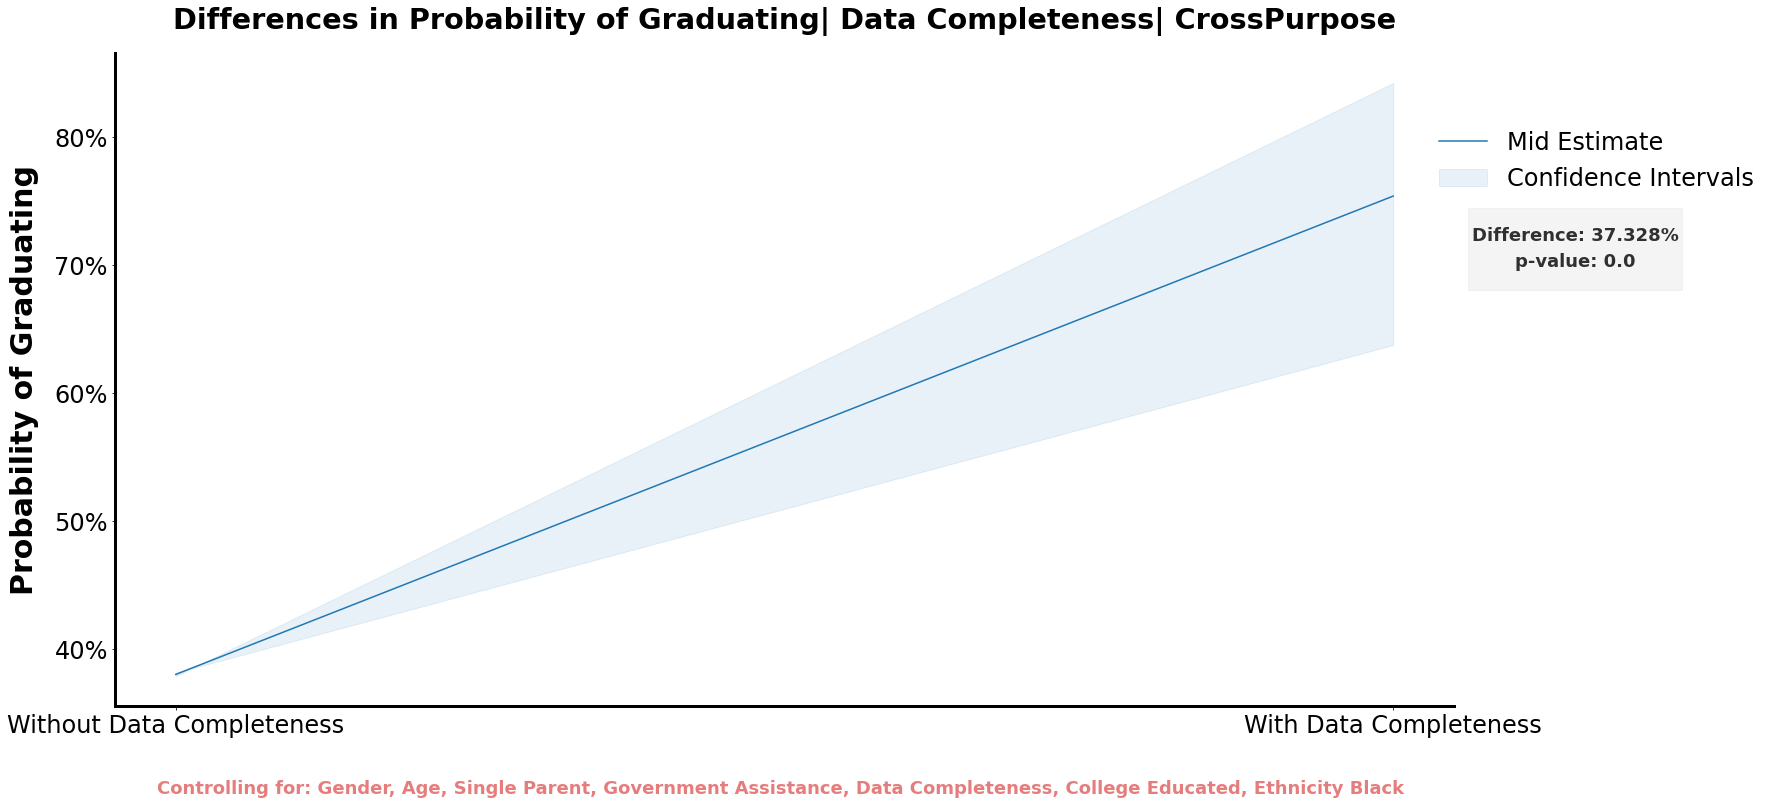

In [ ]:
#@title Plot graph of probability 
clean_variable = variable.replace("_", " ").title()
fig, ax = plt.subplots(figsize=(24,12))

x = [f"Without {clean_variable}", f"With {clean_variable}"]

# middle estimate
y_normal = [base_prob, comp_prob]
ax.plot(x, y_normal, label='Mid Estimate')

# Create and plot upper and lower bounds
y_lower = [base_prob_lower, comp_prob_lower]
y_upper = [base_prob_upper, comp_prob_upper]
ax.fill_between(x, (y_lower), (y_upper), color='tab:blue', alpha=0.1,
                label='Confidence Intervals')

# Customise y-axis
ax.set_ylabel('Probability of Graduating', fontweight='semibold', labelpad=15)
ax.yaxis.set_major_formatter(ticker.PercentFormatter())

# Hide plots
[ax.spines[loc].set_visible(False) for loc in ['top', 'right']]

# Title
ax.set_title(f'Differences in Probability of Graduating| {clean_variable}| CrossPurpose', fontweight='semibold', pad=25)


# plot results bg box
plt.text(0.97, 0.64, ' ', color='tab:blue', 
         bbox=dict(facecolor='tab:grey', 
                   edgecolor='tab:grey', 
                   alpha=0.08, pad=100, mutation_aspect=0.2), 
         fontsize=42, fontweight='bold', transform=plt.gcf().transFigure, 
         horizontalalignment='center')

# Plot text
plt.text(0.97, 0.67, f'Difference: {diff}%', 
     color='black', fontsize=18, fontweight='bold', alpha=0.8,
     transform=plt.gcf().transFigure, horizontalalignment='center', verticalalignment='center')  
# Plot text
plt.text(0.97, 0.64, f'p-value: {p_val}', 
     color='black', fontsize=18, fontweight='bold', alpha=0.8,
     transform=plt.gcf().transFigure, horizontalalignment='center', verticalalignment='center') 

# Plot text
plt.text(0.51, 0.03, f"Controlling for: {controls}", 
     color='tab:red', alpha=0.6, fontsize=18, fontweight='bold', 
     transform=plt.gcf().transFigure, horizontalalignment='center', verticalalignment='center') 


# Legend
ax.legend(bbox_to_anchor=(0.98, 0.9),
          frameon=False, borderaxespad=0.1, loc='upper left')